In [1]:
import pandas as pd

df = pd.read_csv('melted_traffic.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.sort_values(by=['DateTime'], inplace=True)

In [2]:
df.shape

(146805, 11)

In [4]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
import os.path
from sklearn.preprocessing import normalize


# Intialize h2o
h2o.init()

# save axis
ax = df[['DateTime']]
del df['DateTime']

# standard scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# create H2O Frame
hdf = h2o.H2OFrame(df)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /Users/johnhogue/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/0n/yk56rzc12q7_3klq61rrmq800000gn/T/tmpmwi1gq9c
  JVM stdout: /var/folders/0n/yk56rzc12q7_3klq61rrmq800000gn/T/tmpmwi1gq9c/h2o_johnhogue_started_from_python.out
  JVM stderr: /var/folders/0n/yk56rzc12q7_3klq61rrmq800000gn/T/tmpmwi1gq9c/h2o_johnhogue_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_johnhogue_icbc6a
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [29]:
# Define Autoencoder
model = H2OAutoEncoderEstimator(
    hidden=[30, 15, 30],
    epochs=10000,
    activation="tanhwithdropout",
    l1=1e-5,
    ignore_const_cols=False,
    autoencoder=True,
    sparse=True,
    adaptive_rate=True
)

# Train Autoencoder
model.train(x=hdf.names, training_frame=hdf)

model

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1543716655527_12


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.05175339337228187
RMSE: 0.22749372161068943
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2018-12-01 20:22:55,0.061 sec,0.00000 obs/sec,0.0,0,0.0,0.2926521,0.0856453
,2018-12-01 20:23:00,5.542 sec,146540 obs/sec,5.4511563,8,800257.0,0.2859539,0.0817696
,2018-12-01 20:23:06,10.928 sec,157030 obs/sec,11.5822349,17,1700330.0,0.2274937,0.0517534
,2018-12-01 20:23:11,16.113 sec,162665 obs/sec,17.7142536,26,2600541.0,0.2780980,0.0773385
,2018-12-01 20:23:16,21.464 sec,164278 obs/sec,23.8509179,35,3501434.0,0.2726222,0.0743228
,2018-12-01 20:23:22,26.796 sec,165339 obs/sec,29.9807840,44,4401329.0,0.2301281,0.0529589
,2018-12-01 20:23:27,32.128 sec,166078 obs/sec,36.1128640,53,5301549.0,0.2635684,0.0694683
,2018-12-01 20:23:32,37.517 sec,166340 obs/sec,42.2419672,62,6201332.0,0.2462890,0.0606583
,2018-12-01 20:23:38,42.917 sec,166496 obs/sec,48.3730527,71,7101406.0,0.2469536,0.0609861
,2018-12-01 20:23:43,48.362 sec,166465 obs/sec,54.5019107,80,8001153.0,0.2447265,0.0598911


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Month,1.0,1.0,0.1747252
Week_of_Year,0.9956436,0.9956436,0.1739640
Traffic_Volume_-3_hr,0.7168372,0.7168372,0.1252495
Traffic_Volume_-2_hr,0.7117508,0.7117508,0.1243608
Traffic_Volume_-1_hr,0.6746469,0.6746469,0.1178778
Traffic_Volume,0.6446888,0.6446888,0.1126434
Hour,0.4057947,0.4057947,0.0709026
Day_of_Week,0.4010468,0.4010468,0.0700730
Year,0.0896794,0.0896794,0.0156693
Day_of_Month,0.0831848,0.0831848,0.0145345


In [20]:
# determine the model reconstruction error
reconstruction_error = model.anomaly(hdf, per_feature=True)
print(reconstruction_error)

# rejoin the date axis
re_df = reconstruction_error.as_data_frame()
re_df = re_df.join(ax)

# save out
re_df.to_csv('reconstruction_error_per_feature.csv.gz', index=False, compression='gzip')

reconstr_Traffic_Volume.SE,reconstr_Traffic_Volume_-1_hr.SE,reconstr_Traffic_Volume_-2_hr.SE,reconstr_Traffic_Volume_-3_hr.SE,reconstr_Day_of_Week.SE,reconstr_Year.SE,reconstr_Month.SE,reconstr_Week_of_Year.SE,reconstr_Day_of_Month.SE,reconstr_Hour.SE
0.0123074,0.0021028,0.0123472,0.00268708,0.153328,0.240371,0.222038,0.205221,0.310599,0.0402371
0.021141,0.0130267,0.00141784,0.00528059,0.153328,0.240371,0.222038,0.205221,0.310599,0.0246847
0.0258248,0.0220805,0.0112217,0.00579187,0.153328,0.240371,0.222038,0.205221,0.310599,0.012913
0.0208429,0.0268621,0.0197102,0.0208463,0.153328,0.240371,0.222038,0.205221,0.310599,0.00492201
0.0193843,0.0217758,0.0242408,0.0319849,0.153328,0.240371,0.222038,0.205221,0.310599,0.000711756
0.0159367,0.0202843,0.0194224,0.0376922,0.153328,0.240371,0.222038,0.205221,0.310599,0.000282223
0.00821246,0.0167537,0.0180153,0.031618,0.153328,0.240371,0.222038,0.205221,0.310599,0.00363341
0.000686539,0.00880185,0.0146977,0.0298153,0.153328,0.240371,0.222038,0.205221,0.310599,0.0107653
0.00311754,0.00086421,0.00733013,0.025499,0.153328,0.240371,0.222038,0.205221,0.310599,0.0216779
0.0117841,0.0027709,0.000449246,0.0153924,0.153328,0.240371,0.222038,0.205221,0.310599,0.0363713


In [30]:
# get predictions
predictions = model.predict(hdf)
p_df = predictions.as_data_frame()
p_df.head()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstr_Traffic_Volume,reconstr_Traffic_Volume_-1_hr,reconstr_Traffic_Volume_-2_hr,reconstr_Traffic_Volume_-3_hr,reconstr_Day_of_Week,reconstr_Year,reconstr_Month,reconstr_Week_of_Year,reconstr_Day_of_Month,reconstr_Hour
0,-0.808343,-1.029758,-1.192828,-1.298252,0.13883,-0.138591,-0.239745,-0.267374,0.161886,-0.901847
1,-0.808343,-1.029758,-1.192828,-1.298252,0.13883,-0.138591,-0.239745,-0.267374,0.161886,-0.901847
2,-0.808343,-1.029758,-1.192828,-1.298252,0.13883,-0.138591,-0.239745,-0.267374,0.161886,-0.901847
3,-0.808343,-1.029758,-1.192828,-1.298252,0.13883,-0.138591,-0.239745,-0.267374,0.161886,-0.901847
4,-0.808343,-1.029758,-1.192828,-1.298252,0.13883,-0.138591,-0.239745,-0.267374,0.161886,-0.901847


In [31]:
# RMSE of Total traffic volume
preds = p_df['reconstr_Traffic_Volume']
actual = df['Traffic_Volume']
rmse = ((preds - actual) ** 2).mean() ** .5
print(f'RMSE: {rmse}')

from sklearn.metrics import r2_score


r2 = r2_score(actual, preds)
print(f'R^2: {r2}')

RMSE: 0.7325750292752861
R^2: 0.4633338264823095


In [11]:
df['Traffic_Volume'].describe()

count    1.468050e+05
mean     5.333911e-16
std      1.000003e+00
min     -1.668713e+00
25%     -1.012233e+00
50%      5.930807e-02
75%      8.503491e-01
max      2.178645e+00
Name: Traffic_Volume, dtype: float64

In [15]:
import seaborn as sns
%matplotlib inline


sns.distplot(p_df[['reconstr_Traffic_Volume']])

ImportError: dlopen(/Users/johnhogue/anaconda3/lib/python3.6/site-packages/matplotlib/ft2font.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libfreetype.6.dylib
  Referenced from: /Users/johnhogue/anaconda3/lib/python3.6/site-packages/matplotlib/ft2font.cpython-36m-darwin.so
  Reason: Incompatible library version: ft2font.cpython-36m-darwin.so requires version 22.0.0 or later, but libfreetype.6.dylib provides version 21.0.0

In [ ]:
sns.distplot(df[['Traffic_Volume']])

In [ ]:
sns.distplot(re_df[['reconstr_Traffic_Volume.SE']])

In [ ]:
df[df.columns] = scaler.inverse_transform(df[df.columns])
p_df.columns = [col.replace('reconstr_', '') for col in p_df.columns]
p_df[p_df.columns] = scaler.inverse_transform(p_df[p_df.columns])

In [ ]:
df = df.join(ax)
p_df = p_df.join(ax)
p_df = p_df.join(df, lsuffix ='_preds')
del p_df['DateTime_preds']

In [ ]:
p_df.set_index(['DateTime'], inplace=True)

In [ ]:
p_df.shape

In [13]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20, 20

In [14]:
temp_df = p_df[['Traffic_Volume', 'Traffic_Volume_preds']].reset_index()
# http://www.startribune.com/marchers-block-i-94-to-westbound-traffic/386158771/
temp_df = temp_df[(temp_df['DateTime'] >= '2016-07-10') & (temp_df['DateTime'] <= '2016-07-12')]
temp_df.set_index(['DateTime'], inplace=True)
import matplotlib.pyplot as plt
plt.figure()
temp_df.plot()

KeyError: "['Traffic_Volume' 'Traffic_Volume_preds'] not in index"

<Figure size 1440x1440 with 0 Axes>

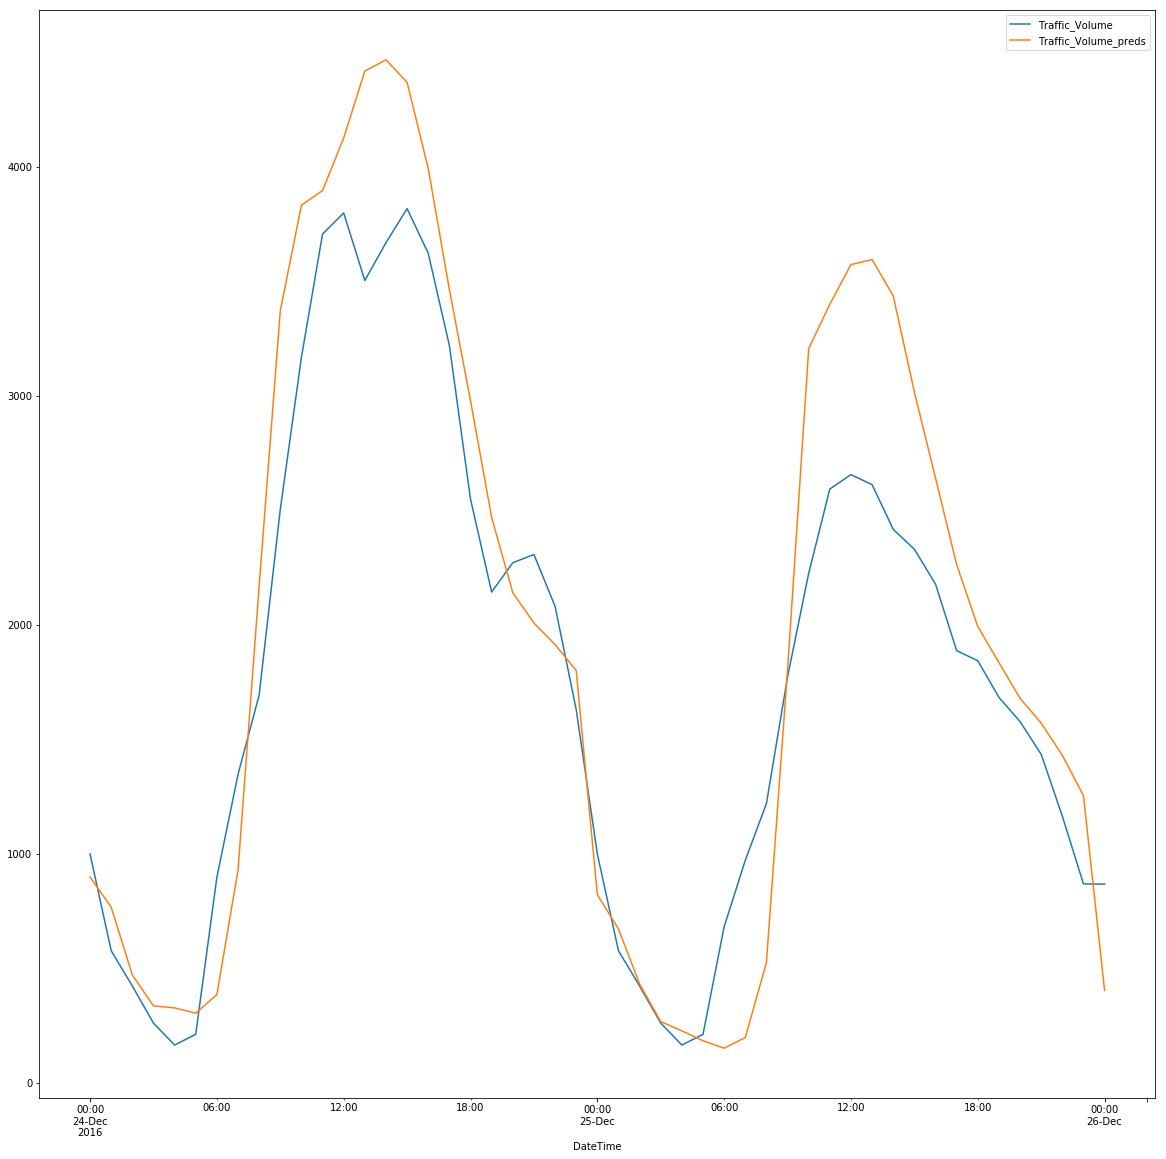

In [74]:
temp_df = p_df[['Traffic_Volume', 'Traffic_Volume_preds']].reset_index()
temp_df = temp_df[(temp_df['DateTime'] >= '2016-12-24') & (temp_df['DateTime'] <= '2016-12-26')]
temp_df.set_index(['DateTime'], inplace=True)
import matplotlib.pyplot as plt
plt.figure()
temp_df.plot()

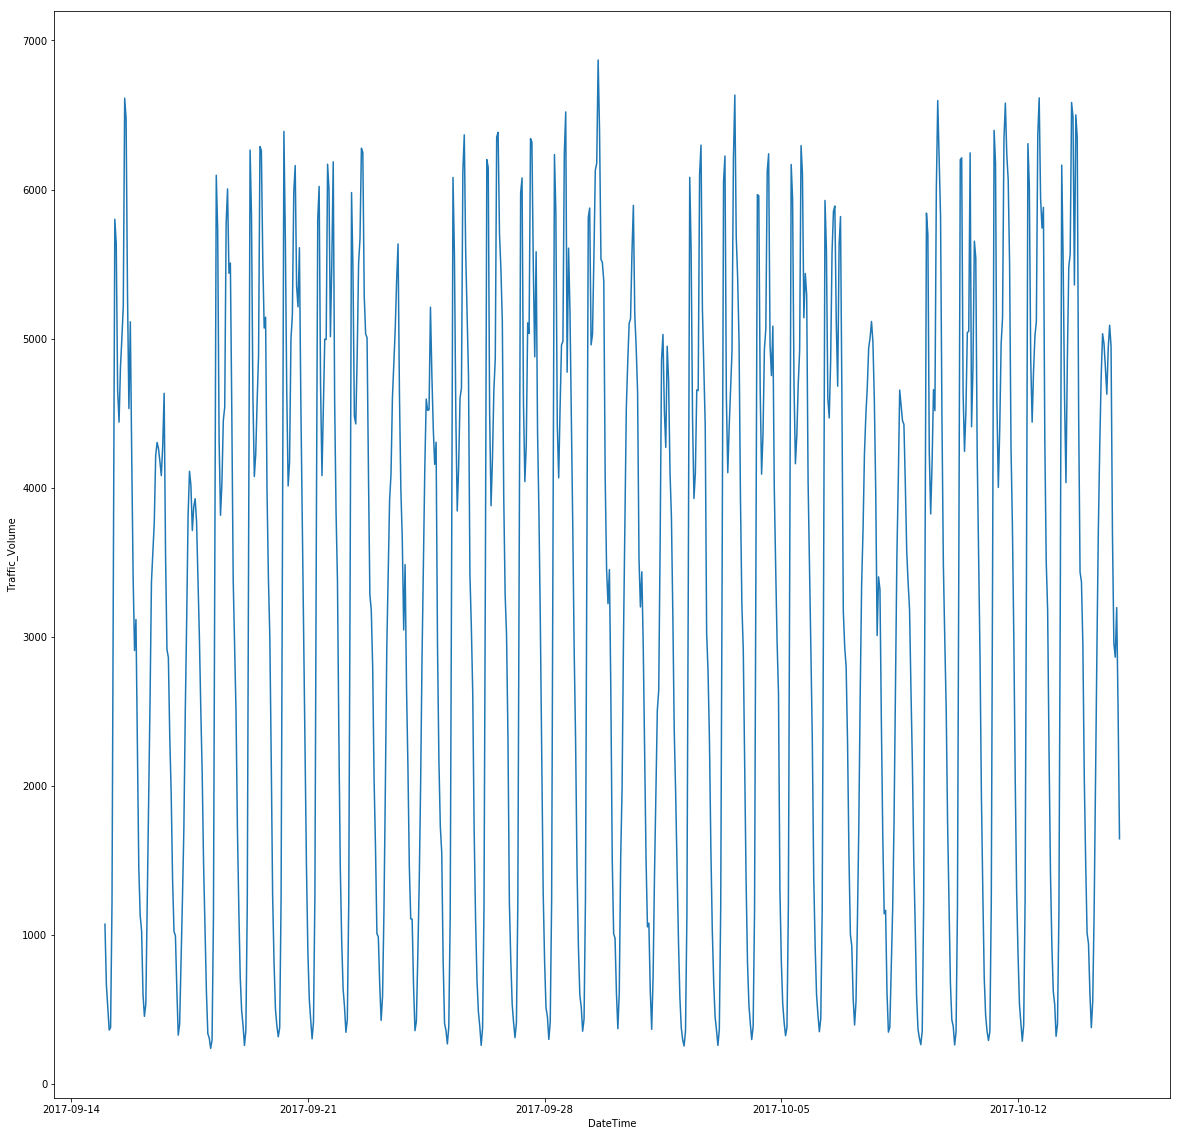

In [63]:
temp_df = p_df[['Traffic_Volume', 'Traffic_Volume_preds']].reset_index()
temp_df = temp_df[(temp_df['DateTime'] >= '2017-09-15') & (temp_df['DateTime'] <= '2017-10-15')]

sns.lineplot(x='DateTime', y='Traffic_Volume', data=temp_df)

In [80]:
outliers = re_df[re_df['reconstr_Traffic_Volume.SE'] >= re_df['reconstr_Traffic_Volume.SE'] .quantile(.99)].copy()
outliers.set_index('DateTime', inplace=True)
outliers.shape

(1403, 10)

In [65]:
df[df['DateTime'] == '2017-09-28']

,Traffic_Volume,Traffic_Volume_-1_hr,Traffic_Volume_-2_hr,Traffic_Volume_-3_hr,Day_of_Week,Year,Month,Week_of_Year,Day_of_Month,Hour,DateTime
137973,825.0,1284.0,2177.0,3075.0,3.0,2017.0,9.0,39.0,28.0,0.0,2017-09-28


In [66]:
temp_df = temp_df[(temp_df['DateTime'] >= '2017-09-15') & (temp_df['DateTime'] >= '2017-10-15')]

In [78]:
outliers.sort_values(by=['reconstr_Traffic_Volume.SE'], inplace=True, ascending=False)
outliers[['reconstr_Traffic_Volume.SE']]

,reconstr_Traffic_Volume.SE
DateTime,
2006-03-13 10:00:00,0.273648
2003-05-19 09:00:00,0.249434
2006-03-13 09:00:00,0.238696
2003-05-19 14:00:00,0.224804
2006-05-29 10:00:00,0.212391
2003-05-20 10:00:00,0.210724
2011-02-21 10:00:00,0.210416
2004-05-31 10:00:00,0.207659
2003-05-19 10:00:00,0.205007


In [81]:
temp_df = outliers.reset_index()
temp_df[(temp_df['DateTime'] >= '2016-07-10') & (temp_df['DateTime'] <= '2016-07-12')]

,DateTime,reconstr_Traffic_Volume.SE,reconstr_Traffic_Volume_-1_hr.SE,reconstr_Traffic_Volume_-2_hr.SE,reconstr_Traffic_Volume_-3_hr.SE,reconstr_Day_of_Week.SE,reconstr_Year.SE,reconstr_Month.SE,reconstr_Week_of_Year.SE,reconstr_Day_of_Month.SE,reconstr_Hour.SE
1161,2016-07-10 20:00:00,0.099542,0.001574,0.00874,0.008652,0.000004,0.007598,0.000026,0.000007,0.000075,0.000074
